# Week 13 - Earn-Back Points Assignment #3

These exercises are entirely optional, but they provide good practice. And you can use them to earn extra points toward your semester grade.  Each problem in this notebook can you earn you back up to 2 points.  There are key requirements, though. If your code does not following these rules, you will earn no points for your work.
* You MUST include docstrings that explain the purpose of your code.
* You MUST include at least 2 example tests in your docstrings for each function you write.
* You MUST run your docstrings within the notebook to show me your code and docstrings work correctly.
* You MUST submit your own individual work.  You may not collaborate with other students on these assignments.

There will be 4 assignments like this between now and the end of the semester, each with 4 problems, each worth 2 points, for a total of 32 points.

**If anything about the above rules is unclear, please message me on Canvas or via email**

---

## Earn-Back 1: Fetal Activity Data

Cardiotocograms are a useful tool for monitoring the health of fetuses and potential mortality of fetuses and pregnant women. This [dataset on Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?resource=download) is a collection of measurements 2,126 test subjects. Let's do some interesting things with this data!

I've already downloaded it and put in the Jupyter server under /data/fetal_health.csv

Your first step is to write a python function called **risk_score()** that takes three input parameters (shown below) and returns back a new series computed using the following rules to compute a total risk score:
* If the histograph number of peaks is greater than 5, add 1 to the risk score
* If the number of accelerations per second is greater than 0.01, add 1 to the risk score
* If the number of light decelerations per second is greather than 0.005, add 1 to the risk score

*Note that these rules were made up by the instructor. They have no scientific basis behind them.*


In [4]:
import pandas as pd
df = pd.read_csv('/data/fetal_health.csv')

df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
def risk_score(peaks, accelerations, decelerations):
    """(float, float, float)->int
    
    The inputs are histograph number of peaks, acceleration per second, and light deceleration per second.  
    The function computes the risk score based on the three inputs.  Ifthe histograph number of peaks is 
    greater than 5, add 1 to the risk score. If the number of accelerations per second is greater than 0.01, 
    add 1 to the risk score. If the number of light decelerations per second is greather than 0.005, 
    add 1 to the risk score.  The function returns the risk score.  
    
    >>> risk_score(2, 0.0, 0.0)
    0
    
    >>> risk_score(6, 0.006, 0.003)
    1
    
    """
    risk = 0
    if peaks > 5:
        risk += 1
    if accelerations > 0.01:
        risk += 1
    if decelerations > 0.005:
        risk += 1
        
    return risk

In [8]:
import doctest
doctest.run_docstring_examples(risk_score, globals(), verbose=True)

Finding tests in NoName
Trying:
    risk_score(2, 0.0, 0.0)
Expecting:
    0
ok
Trying:
    risk_score(6, 0.006, 0.003)
Expecting:
    1
ok


In [6]:
assert risk_score(2, 0.0, 0.0) == 0
assert risk_score(6, 0.006, 0.003) == 1
assert risk_score(5, 0.015, 0.0) == 1

---

## Earn-Back Part 2: Score the Data

In this next step, write a function called **score_subjects()** that takes your whole Dataframe as input and returns a new Series with scores for every record.  I recommend doing this with the `apply()` function similar to the BMI example below:

In [9]:
# 1. Create our sample dataframe
people = pd.DataFrame([
    ['Joe', 170, 85],
    ['Alex', 190, 110]
], columns=['Name','Height (cm)','Weight (kg)'])

# 2. Define our function just like we would a normal function to calculate BMI
def bmi(height_cm, weight_kg):
    return weight_kg / ((height_cm/100) ** 2)

# 3. Apply the bmi() function to each row using a lambda function
#    Set "axis=1" to apply the function to each row (instead of column)
#    Use an anonymous "lambda" function to call bmi function
#    passing the height and weight columns from our dataframe.
people.apply(lambda x: bmi(x['Height (cm)'],x['Weight (kg)']), axis=1)

0    29.411765
1    30.470914
dtype: float64

#### Start Your Code Here

In [10]:
def score_subjects(df):
    return df.apply(lambda x: risk_score(
        x['histogram_number_of_peaks'],
        x['accelerations'],
        x['light_decelerations']
    ), axis=1)

In [11]:
assert len(score_subjects(df).value_counts()) == 4
assert max(score_subjects(df)) == 3
assert min(score_subjects(df)) == 0
assert score_subjects(df).value_counts()[0] == 1341
assert score_subjects(df).value_counts()[1] == 574

## Earn-Back Part 3:

Insert the results of your **score_subjects()** function as a new column in your dataframe. Call that new column **Risk Score**
You do not need to write a function to this.  Just write this code directly in the cells below.  Provide some minimal documentation to explain what you're doing.

In [33]:
df['Risk Score'] = score_subjects(df)

## Earn-Back Part 4:

Summarize your dataframe in the following way. For each **Risk Score** provide the following aggregates:
* Count
* Average **histogram_number_of_peaks**
* Average **acceleration**
* Average **light_deceleration**

In [37]:
df.groupby('Risk Score').agg({
    'Risk Score': 'count',
    'histogram_number_of_peaks': 'mean',
    'accelerations': 'mean',
    'light_decelerations': 'mean'
})

,Risk Score,histogram_number_of_peaks,accelerations,light_decelerations
Risk Score,,,,
0,1341,2.384787,0.002371,0.000675
1,574,6.576655,0.004643,0.003051
2,210,7.952381,0.004295,0.006448
3,1,6.000000,0.011000,0.007000


In [38]:
summary = df.groupby('Risk Score').agg({
    'Risk Score': 'count',
    'histogram_number_of_peaks': 'mean',
    'accelerations': 'mean',
    'light_decelerations': 'mean'
})

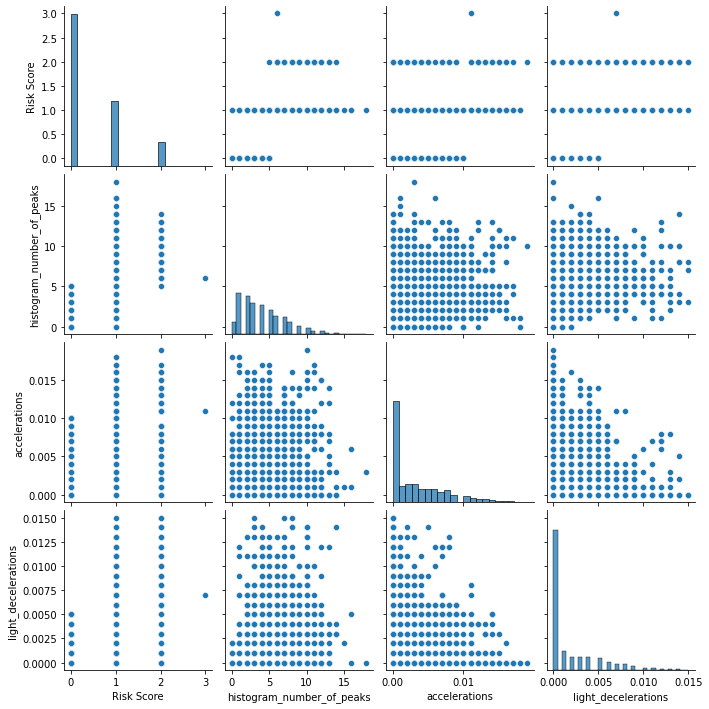

In [40]:
import seaborn as sns
sns.pairplot(df[['Risk Score','histogram_number_of_peaks','accelerations','light_decelerations']])

## Submit your work to github in your week 11 folder by 11/18 11:59 PM